In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [40]:
df = pd.read_csv('data.csv')
df.head(10)

,Retailer01,Retailer02,Retailer03,Retailer04,Retailer05,Retailer06,Retailer07,Retailer08
0,3,6,1,6,7,6,1,4
1,6,5,6,10,7,5,1,1
2,3,4,8,4,5,7,4,1
3,8,10,5,4,5,9,6,4
4,1,4,9,9,9,6,7,4
5,9,9,9,5,2,3,8,2
6,3,3,1,9,10,7,2,2
7,2,1,6,10,5,8,6,8
8,3,1,7,6,8,5,3,2
9,6,7,10,9,7,2,2,7


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Retailer01  50000 non-null  int64
 1   Retailer02  50000 non-null  int64
 2   Retailer03  50000 non-null  int64
 3   Retailer04  50000 non-null  int64
 4   Retailer05  50000 non-null  int64
 5   Retailer06  50000 non-null  int64
 6   Retailer07  50000 non-null  int64
 7   Retailer08  50000 non-null  int64
dtypes: int64(8)
memory usage: 3.1 MB


In [42]:
N = 50000
ads = 8
ads_selected = []
selected_ads = [0] * ads
sum_rewards = [0] * ads
total_reward = 0
for i in range(0, N):
    retail = 0
    max_upper_bound = 0
    
    for j in range(0, ads):
        if (selected_ads[j] > 0):
            average_reward = sum_rewards[j] + selected_ads[j]
            conf_bound = math.sqrt(3 / 2 * math.log(i + 1) / selected_ads[j])
            upper_bound =  average_reward + conf_bound
        else:
            upper_bound = 1e400
        if (max_upper_bound > upper_bound):
            max_upper_bound = upper_bound
            retail = j
    ads_selected.append(retail)
    selected_ads[retail] += 1
    reward = df.values[i, retail]
    sum_rewards[retail] += reward
    total_reward += reward 

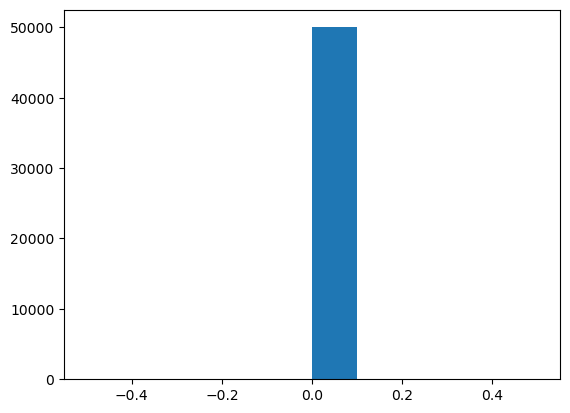

In [43]:
plt.hist(ads_selected)
plt.show()